# Mini Project 1

# Analysing COVID-19 in Australia and Prediction

 __Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import folium


# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

Populating the interactive namespace from numpy and matplotlib


__Load all the files into the DataFrames__

In [26]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


#  1.EDA

__Perform EDA on this datasets__

In [27]:
#check shape of the data frames
print(confirmed_df.shape)
print(deaths_df.shape)
print(recoveries_df.shape)

(268, 290)
(268, 290)
(255, 290)


In [28]:
#Head
confirmed_df.head()
deaths_df.head()
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34023,34129,34150,34217,34237,34239,34258,34321,34326,34342
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10548,10654,10705,10808,10893,11007,11097,11189,11246,11367
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,38932,39095,39273,39444,39635,39635,40014,40201,40395,40577
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2729,2729,2957,3029,3144,3260,3377,3475,3475,3548
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3461,3508,3530,3647,3693,3736,4107,4523,4920,5172


In [29]:
#Tail
confirmed_df.tail()
deaths_df.tail()
recoveries_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20
250,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,43232,43592,44055,44444,44985,45448,45896,46309,46773,47169
251,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
252,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1360,1360,1360,1364,1366,1366,1366,1366,1366,1375
253,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15179,15179,15445,15481,15559,15585,15600,15680,15733,15733
254,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,7785,7797,7797,7804,7845,7864,7884,7894,7927,7939


__Obtained the Data Frames where Country is Australia__

In [30]:
#Australia confirmed cases data frame
confirmed_Australia=confirmed_df.iloc[8:16]
confirmed_Australia=confirmed_Australia.reset_index(drop=True)

#Australia death cases data frame
deaths_Australia=deaths_df.iloc[8:16]
deaths_Australia=deaths_Australia.reset_index(drop=True)

#Australia recovery cases data frame
recoveries_Australia=recoveries_df.iloc[8:16]
recoveries_australia=recoveries_Australia.reset_index(drop=True)

In [31]:
# Check Null Values
confirmed_Australia.isnull().sum().sum()
deaths_Australia.isnull().sum().sum()
recoveries_Australia.isnull().sum().sum()

0

In [32]:
# DataFrame info
confirmed_Australia.info()
# Data Types
confirmed_Australia.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 290 entries, Province/State to 11/2/20
dtypes: float64(2), int64(286), object(2)
memory usage: 18.2+ KB


Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
10/29/20            int64
10/30/20            int64
10/31/20            int64
11/1/20             int64
11/2/20             int64
Length: 290, dtype: object

In [33]:
#coloumns of data frame
cols=confirmed_Australia.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/24/20', '10/25/20', '10/26/20', '10/27/20', '10/28/20', '10/29/20',
       '10/30/20', '10/31/20', '11/1/20', '11/2/20'],
      dtype='object', length=290)


In [34]:
# Select only time series of Data Frame
confirmed = confirmed_Australia.loc[ :,cols[4]:cols[-1]]
deaths=deaths_Australia.loc[:,cols[4]:cols[-1]]
recoveries=recoveries_Australia.loc[:,cols[4]:cols[-1]]

In [35]:
#List for total confirmed,death,recoveries and active cases
# sum of confirmed, death and recovery cases
dates = confirmed.keys()
total_confirmed = []
total_deaths = [] 
total_recovered = [] 
total_active = []
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    total_confirmed.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)


__Define a function for Daily increase cases and Moving average__

In [36]:
# Daily  increase function
def daily_increase(data):
    daily = [] 
    for i in range(len(data)):
        if i == 0:
            daily.append(data[0])
        else:
            daily.append(data[i]-data[i-1])
    return daily 

# Moving average function
def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
Aus_daily_confirmed = daily_increase(total_confirmed)
Aus_confirmed_avg= moving_average(total_confirmed, window)
Aus_daily_confirmed_avg = moving_average(Aus_daily_confirmed, window)

# deaths
Aus_daily_death = daily_increase(total_deaths)
Aus_death_avg = moving_average(total_deaths, window)
Aus_daily_death_avg = moving_average(Aus_daily_death, window)


# recoveries
Aus_daily_recovery = daily_increase(total_recovered)
Aus_recovery_avg = moving_average(total_recovered, window)
Aus_daily_recovery_avg = moving_average(Aus_daily_recovery, window)

# active 
Aus_daily_active=daily_increase(total_active)
Aus_active_avg = moving_average(total_active, window)

In [37]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_confirmed = np.array(total_confirmed).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [58]:
#Convert integer into datetime for better visualization
days_in_future = 30
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-30]

# 2.Graphs

__Graphing the COVID-19  confirmed cases, active cases, death cases, recovery cases in Australia__

Plot for confirmed cases, active cases, death cases, recovery cases

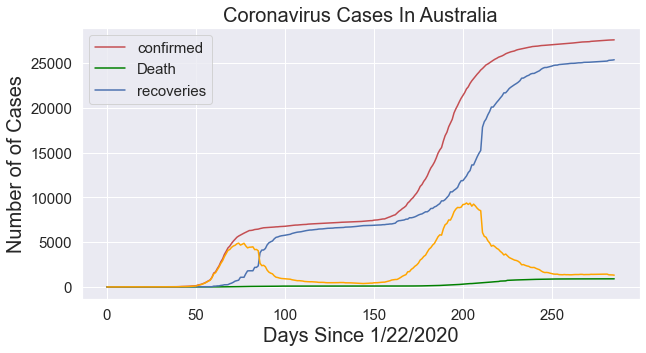

In [59]:
# Plot for confirmed cases, active cases, death cases, recovery cases
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_confirmed, color='r')
plt.plot(adjusted_dates, total_deaths, color='green')
plt.plot(adjusted_dates, total_recovered, color='b')
plt.plot(adjusted_dates, total_active, color='orange')
plt.legend(['confirmed','Death', 'recoveries'], loc='best', fontsize=15)
plt.title('Coronavirus Cases In Australia', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Plots for confirmed cases, active cases, death cases, recovery cases with Moving Average of 7 Days in Australia

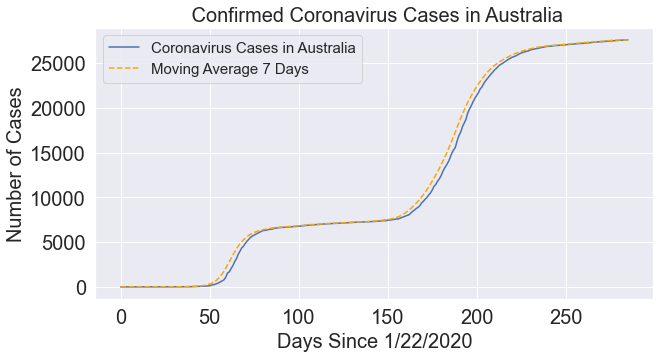

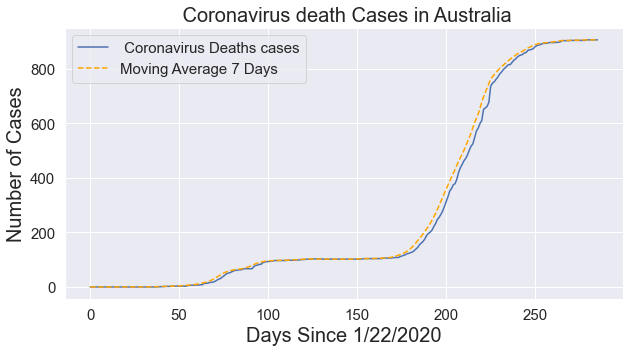

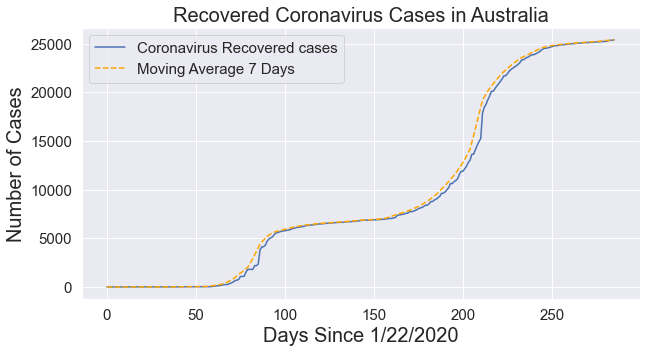

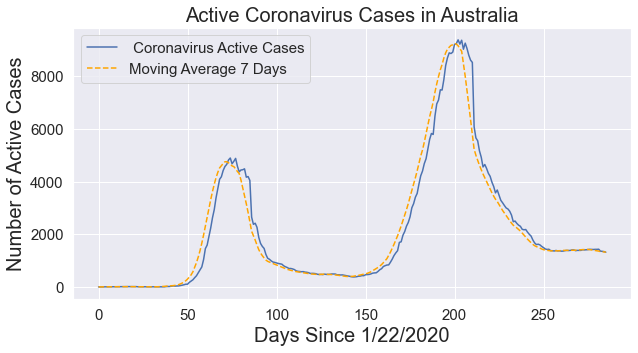

In [60]:
# Plots for confirmed cases, active cases, death cases, recovery cases with Moving Average of 7 Days

#Confirmed cases 
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_confirmed)
plt.plot(adjusted_dates, Aus_confirmed_avg, linestyle='dashed', color='orange')
plt.title(' Confirmed Coronavirus Cases in Australia', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Coronavirus Cases in Australia', 'Moving Average {} Days'.format(window)], prop={'size': 15})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Death cases
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, Aus_death_avg, linestyle='dashed', color='orange')
plt.title(' Coronavirus death Cases in Australia', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend([' Coronavirus Deaths cases', 'Moving Average {} Days'.format(window)], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Recovery cases
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, Aus_recovery_avg, linestyle='dashed', color='orange')
plt.title('Recovered Coronavirus Cases in Australia', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Coronavirus Recovered cases', 'Moving Average {} Days'.format(window)], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Active cases
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, Aus_active_avg, linestyle='dashed', color='orange')
plt.title('Active Coronavirus Cases in Australia', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Active Cases', size=20)
plt.legend([' Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Plots for Daily insrease in Confirmed, death and recovery with Moving Average of 7 days

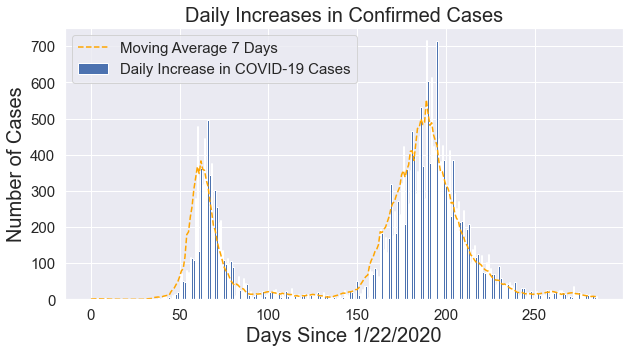

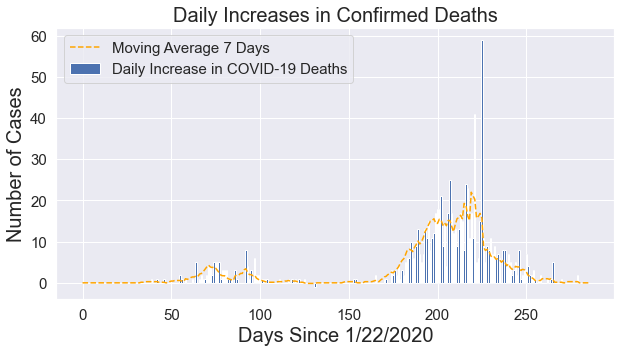

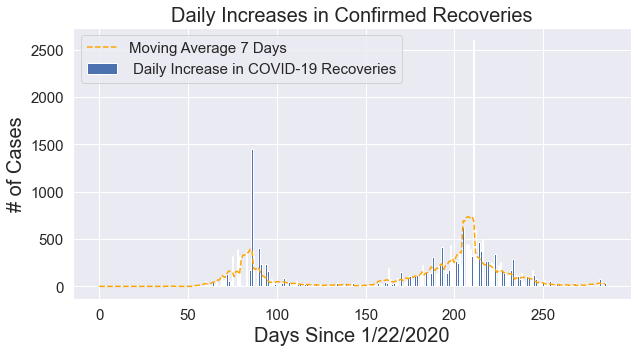

In [61]:
# Daily increase in Confirmed cases
plt.figure(figsize=(10, 5))
plt.bar(adjusted_dates, Aus_daily_confirmed)
plt.plot(adjusted_dates, Aus_daily_confirmed_avg, color='orange', linestyle='dashed')
plt.title('Daily Increases in Confirmed Cases', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'Daily Increase in COVID-19 Cases'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Daily increase in death cases
plt.figure(figsize=(10, 5))
plt.bar(adjusted_dates, Aus_daily_death)
plt.plot(adjusted_dates, Aus_daily_death_avg, color='orange', linestyle='dashed')
plt.title('Daily Increases in Confirmed Deaths', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), 'Daily Increase in COVID-19 Deaths'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Daily Increase in recovery cases
plt.figure(figsize=(10, 5))
plt.bar(adjusted_dates, Aus_daily_recovery)
plt.plot(adjusted_dates, Aus_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('Daily Increases in Confirmed Recoveries', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Moving Average {} Days'.format(window), ' Daily Increase in COVID-19 Recoveries'], prop={'size': 15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Pie chart for total number of confirmed, death and recovery in each state in Australia

Text(0.5, 1.0, 'COVID-19 deaths cases per state in Austalia')

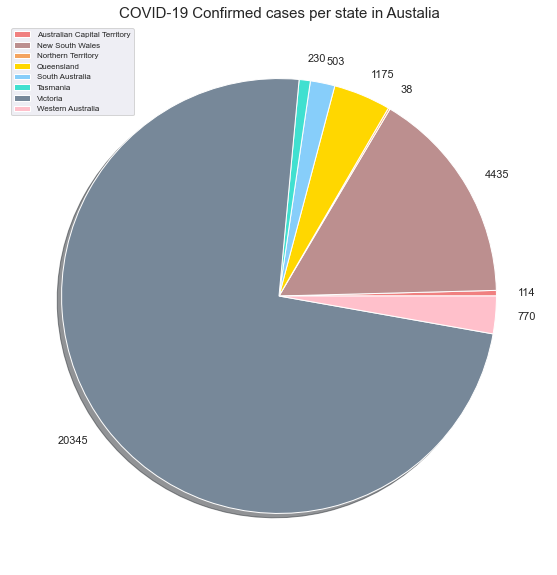

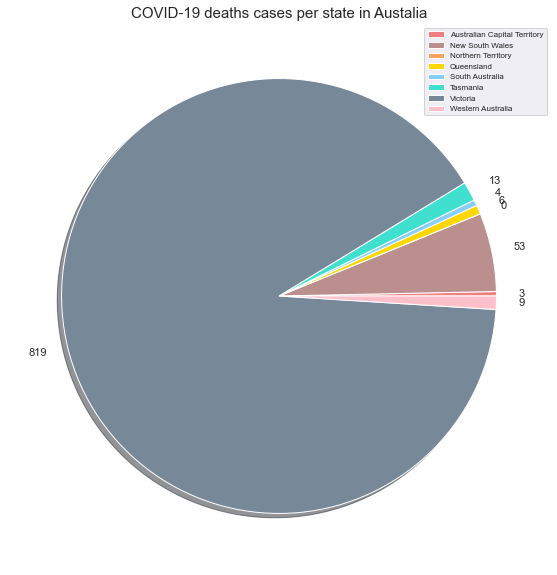

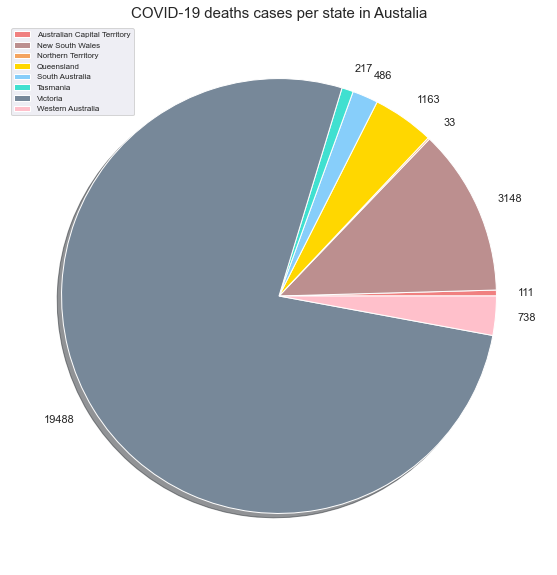

In [62]:
# Pie chart for total Confirmed cases in each state
states=np.array(confirmed_Australia['Province/State'])
total_confirm_number=np.array(confirmed_Australia[cols[-1]])
c = ['lightcoral', 'rosybrown', 'sandybrown', 'gold', 'lightskyblue', 'turquoise', 'lightslategrey', 'pink']
plt.figure(figsize=(10,10))
plt.pie(total_confirm_number, colors=c,shadow=True, labels=total_confirm_number)
plt.legend(states, loc='best', fontsize=8)
plt.title('COVID-19 Confirmed cases per state in Austalia', size=15)

# Pie chart for total death cases in each state
total_deaths_number=np.array(deaths_Australia[cols[-1]])
plt.figure(figsize=(20,10))
plt.pie(total_deaths_number, colors=c,shadow=True, labels=total_deaths_number)
plt.legend(states, loc='best', fontsize=8)
plt.title('COVID-19 deaths cases per state in Austalia', size=15)

# Pie chart for total Recovery cases in each state
total_recoveries_number=np.array(recoveries_Australia[cols[-1]])
plt.figure(figsize=(20,10))
plt.pie(total_recoveries_number, colors=c,shadow=True, labels=total_recoveries_number)
plt.legend(states, loc='best', fontsize=8)
plt.title('COVID-19 deaths cases per state in Austalia', size=15)

__Created a data frame which has 4 columns(State name, total number of confirmed, total number of deaths, total number of recovered, total number of active)__

In [63]:
# Data Frame
states=np.array(confirmed_Australia['Province/State'])
confirmed_cases=np.array(confirmed_Australia.iloc[:,-1].values)
deaths_cases=np.array(deaths_Australia.iloc[:,-1].values)
recover_cases=np.array(recoveries_australia.iloc[:,-1].values)
active_cases=map(lambda x,y,z: x-y-z, confirmed_cases,recover_cases,deaths_cases)

Austalia_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': confirmed_cases,
                          'Number of Deaths': deaths_cases, 'Number of Recoveries' : recover_cases,'Number of Active Cases' : active_cases})

Austalia_df

,State Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases
0,Australian Capital Territory,114,3,111,0
1,New South Wales,4435,53,3148,1234
2,Northern Territory,38,0,33,5
3,Queensland,1175,6,1163,6
4,South Australia,503,4,486,13
5,Tasmania,230,13,217,0
6,Victoria,20345,819,19488,38
7,Western Australia,770,9,738,23


Bar chart which shows total number of confirmed, deaths, recovered cases in each state.

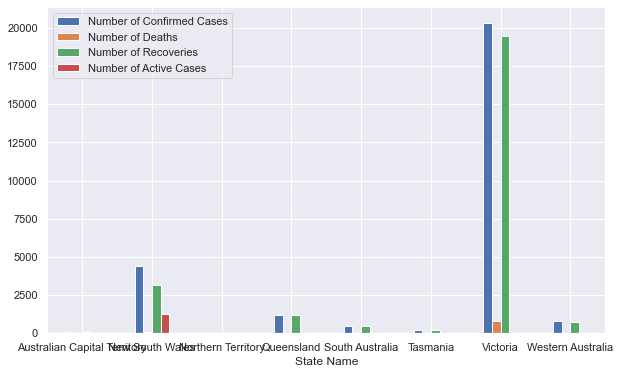

In [64]:
Austalia_df.plot.bar(x='State Name',rot=0);

__Load a file into data Frame which has number of Coronavirus cases Group by Age and Sex__

In [65]:
group_df=pd.read_csv("../.../../Data/groupby_age_sex.csv")
group_df

,AgeGroup,Male,Female
0,0-9,732,649
1,10-19,1187,1147
2,20-29,2951,3230
3,30-39,2386,2340
4,40-49,1735,1721
5,50-59,1557,1672
6,60-69,1145,1176
7,70-79,835,740
8,80-89,491,774
9,90+,232,553


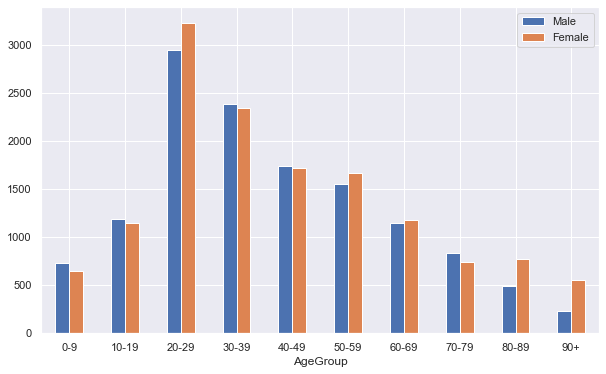

In [66]:
group_df.plot.bar(x='AgeGroup',rot=0);

In [67]:
group_df1=pd.read_csv("../.../../Data/groupby_age_sex_death.csv")
group_df1

,AgeGroup,Male,Female
0,0-9,0,0
1,10-19,0,0
2,20-29,1,0
3,30-39,2,0
4,40-49,2,0
5,50-59,10,5
6,60-69,26,12
7,70-79,100,54
8,80-89,181,195
9,90+,114,191


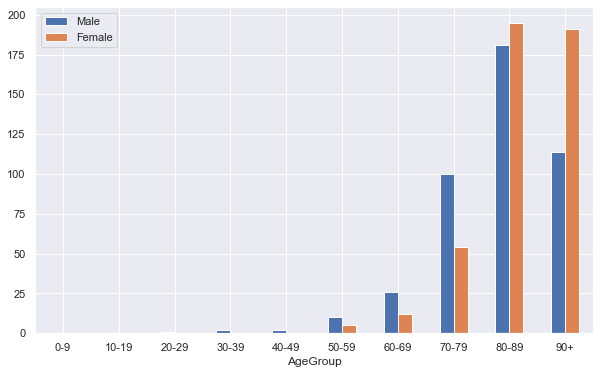

In [68]:
group_df1.plot.bar(x='AgeGroup',rot=0);

#  3.Maps

__Maps that pointing the location of states and shows how much Coronavirus effected in each state__

In [24]:
# Pointing the locations
# Make an empty map
m = folium.Map(location=[-25.734968, 134.489563], zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(confirmed_Australia)):
    folium.Marker([confirmed_Australia.iloc[i]['Lat'], confirmed_Australia.iloc[i]['Long']], popup=confirmed_Australia.iloc[i]['Province/State']).add_to(m)
 
# Save it as html
m.save('folium_map.html')
display(m)

In [28]:
# Coronavirus effected in each state

state_geo = 'https://raw.githubusercontent.com/rowanhogan/australian-states/master/states.geojson'
#confirmed_Australia
m = folium.Map(location=[-25.734968, 134.489563], zoom_start=4)

 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=confirmed_Australia,
 columns=['Province/State', '7/7/20'],
 key_on='properties.STATE_NAME',
 fill_color='YlGn',
 fill_opacity=1,
 line_opacity=1,
 legend_name='confirmed cases'
)
folium.LayerControl().add_to(m)

display(m)

C:\Users\SRIDHAR\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 4.Prediction

__Prediction for Confirmed Coronavirus cases in Australia__

In [69]:
# Time series
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')

future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


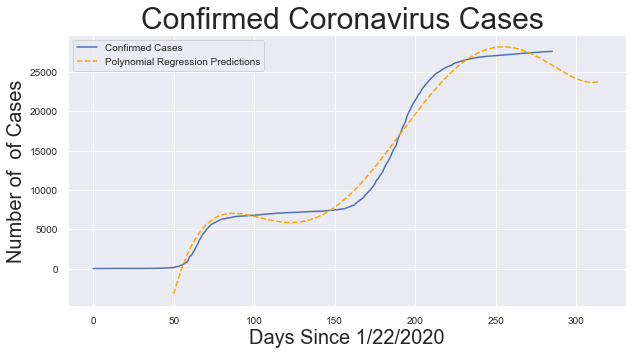

In [70]:
# Train and test subsets
from sklearn.model_selection import train_test_split 
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], total_confirmed[50:], test_size=0.01, shuffle=False) 

# Polynomial Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

# plot for confirmed coronavirus cases with Polynomial Linear Regression
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, total_confirmed)
plt.plot(future_forcast[50:], linear_pred[50:], linestyle='dashed', color='orange')
plt.title('Confirmed Coronavirus Cases ', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of  of Cases', size=20)
plt.legend(['Confirmed Cases','Polynomial Regression Predictions'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()



In [72]:
# Data Frame for Polynomial Predicted number of Confirmed Cases
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-30:], 'Polynomial Predicted number of Confirmed Cases': np.round(linear_pred[-30:])})
linear_df

,Date,Polynomial Predicted number of Confirmed Cases
0,11/03/2020,25723.0
1,11/04/2020,25599.0
2,11/05/2020,25474.0
3,11/06/2020,25350.0
4,11/07/2020,25227.0
5,11/08/2020,25106.0
6,11/09/2020,24986.0
7,11/10/2020,24868.0
8,11/11/2020,24753.0
9,11/12/2020,24641.0
